In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
tensector_csv = 'data/tensectors_final.csv'

tensector_df = pd.read_csv(tensector_csv)

In [5]:
#drop unnamed column
tensector_df = tensector_df.drop(columns=['Unnamed: 0'],axis=1)

In [6]:
#check data
print(tensector_df)

           Date  Consumer Staples  Information Technology  \
0      1/2/2019             93.34                  157.92   
1      1/3/2019             92.86                  142.19   
2      1/4/2019             93.44                  148.26   
3      1/7/2019             94.54                  147.93   
4      1/8/2019             95.20                  150.75   
..          ...               ...                     ...   
246  12/23/2019            119.03                  284.00   
247  12/24/2019            119.51                  284.27   
248  12/26/2019            119.52                  289.91   
249  12/27/2019            119.59                  289.80   
250  12/30/2019            119.40                  291.52   

     Ameriprise Financial  Consumer Discretionary  Utilities  Real Estate  \
0                  107.96                 1539.13      88.77       350.00   
1                  105.10                 1500.28      89.12       345.94   
2                  110.73           

In [6]:
tensector_df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Date</th>\n      <th>Consumer Staples</th>\n      <th>Information Technology</th>\n      <th>Ameriprise Financial</th>\n      <th>Consumer Discretionary</th>\n      <th>Utilities</th>\n      <th>Real Estate</th>\n      <th>Health Care</th>\n      <th>Materials</th>\n      <th>Energy</th>\n      <th>Telecommunication Services</th>\n      <th>Industrials</th>\n      <th>S&amp;P</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1/2/2019</td>\n      <td>93.34</td>\n      <td>157.92</td>\n      <td>107.96</td>\n      <td>1539.13</td>\n      <td>88.77</td>\n      <td>350.00</td>\n      <td>114.88</td>\n      <td>29.18</td>\n      <td>14.72</td>\n      <td>65.26</td>\n      <td>84.18</td>\n      <td>2510.03</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>1/3/2019</td>\n      <td>92.86</td>\n      <td>142.19</td>\n      <td>105.10</td>\n      <td>

In [125]:
X = tensector_df["Consumer Staples"].values.reshape(-1, 1)
y = tensector_df["S&P"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)
X

Shape:  (251, 1) (251, 1)


array([[ 93.34],
       [ 92.86],
       [ 93.44],
       [ 94.54],
       [ 95.2 ],
       [ 94.89],
       [ 94.96],
       [ 94.84],
       [ 94.95],
       [ 96.25],
       [ 96.35],
       [ 96.74],
       [ 97.73],
       [ 97.49],
       [ 98.71],
       [ 98.36],
       [ 96.94],
       [ 97.06],
       [ 96.71],
       [ 94.8 ],
       [ 95.83],
       [ 93.86],
       [ 94.77],
       [ 95.6 ],
       [ 95.64],
       [ 96.73],
       [ 95.58],
       [ 96.2 ],
       [ 96.97],
       [ 97.94],
       [ 98.52],
       [ 99.99],
       [102.2 ],
       [ 99.88],
       [ 99.39],
       [ 99.55],
       [ 99.12],
       [ 98.69],
       [ 98.11],
       [ 98.99],
       [ 97.93],
       [ 97.85],
       [ 98.34],
       [ 98.26],
       [ 97.45],
       [ 97.59],
       [ 98.48],
       [ 98.37],
       [ 99.03],
       [ 98.22],
       [ 98.42],
       [ 99.66],
       [ 99.85],
       [ 98.64],
       [ 99.06],
       [ 98.28],
       [ 98.17],
       [ 98.32],
       [ 97.21

In [126]:


model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[14.57178577]]
y-axis intercept:  [1333.03917504]


In [127]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[92.86]]
Max X Value: [[121.28]]


In [128]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [129]:
# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 5523.845081770971
R-squared (R2 ): 0.7522680947736254


In [130]:
text1 = "Mean Squared Error :5523.8450"
text2 = "R-squared : 0.7522"
text3 = "y-axis intercept: 1333.039"
text4 = "Weight coefficients: 14.5717"
texts = f"{text1}\n{text2}\n{text3}\n{text4}"

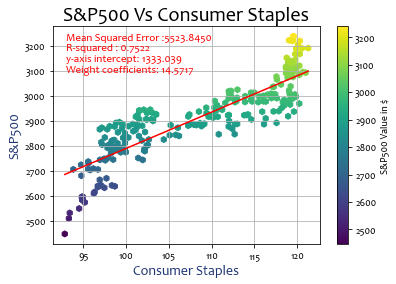

In [131]:
#check for linear relationship - Consumer Staples





fig, ax = plt.subplots()
plt.scatter(tensector_df['Consumer Staples'],tensector_df['S&P'],c=tensector_df['S&P'],marker="h")
plt.title('S&P500 Vs Consumer Staples',fontsize=20)
plt.xlabel('Consumer Staples',color='#203776',fontsize=14)
plt.ylabel('S&P500',color='#203776',fontsize=14)
plt.grid(True)
plt.rcParams["font.family"] = "candara"
plt.annotate(texts,(93,3100),fontsize=11,color="red")
clb = plt.colorbar()
clb.set_label("S&P500 Value in $")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.show()

fig.savefig('Consumer Staples.png',dpi=300)

In [132]:
X = tensector_df['Information Technology'].values.reshape(-1, 1)
y = tensector_df["S&P"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)
X

Shape:  (251, 1) (251, 1)


array([[157.92],
       [142.19],
       [148.26],
       [147.93],
       [150.75],
       [153.31],
       [153.8 ],
       [152.29],
       [150.  ],
       [153.07],
       [154.94],
       [155.86],
       [156.82],
       [153.3 ],
       [153.92],
       [152.7 ],
       [157.76],
       [156.3 ],
       [154.68],
       [165.25],
       [166.44],
       [166.52],
       [171.25],
       [174.18],
       [174.24],
       [170.94],
       [170.41],
       [169.43],
       [170.89],
       [170.18],
       [170.8 ],
       [170.42],
       [170.93],
       [172.03],
       [171.06],
       [172.97],
       [174.23],
       [174.33],
       [174.87],
       [173.15],
       [174.97],
       [175.85],
       [175.53],
       [174.52],
       [172.5 ],
       [172.91],
       [178.9 ],
       [180.91],
       [181.71],
       [183.73],
       [186.12],
       [188.02],
       [186.53],
       [188.16],
       [195.09],
       [191.05],
       [188.74],
       [186.79],
       [188.47

In [133]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [134]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[4.13142739]]
y-axis intercept:  [2053.10716563]


In [135]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[142.19]]
Max X Value: [[291.52]]


In [136]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [137]:
# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 2433.591509597262
R-squared (R2 ): 0.8908589483791292


In [138]:
text1 = "Mean Squared Error : 2433.5915"
text2 = "R-squared : 0.8908"
text3 = "y-axis intercept: 2053.107"
text4 = "Weight coefficients: 4.1314"
texts = f"{text1}\n{text2}\n{text3}\n{text4}"

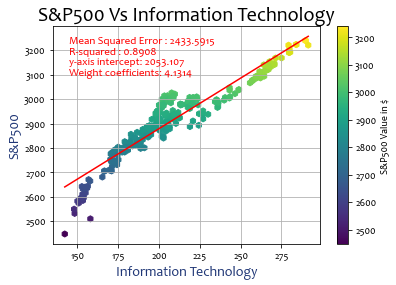

In [139]:
#check for linear relationship - Information Technology

fig, ax = plt.subplots()
plt.scatter(tensector_df['Information Technology'],tensector_df['S&P'],c=tensector_df['S&P'],marker="h")
plt.title('S&P500 Vs Information Technology',fontsize=20)
plt.xlabel('Information Technology',color='#203776',fontsize=14)
plt.ylabel('S&P500',color='#203776',fontsize=14)
plt.grid(True)
plt.rcParams["font.family"] = "candara"
plt.annotate(texts,(145,3100),fontsize=11,color="red")
clb = plt.colorbar()
clb.set_label("S&P500 Value in $")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.show()

fig.savefig('Information Technology.png',dpi=300)

In [140]:
X = tensector_df['Ameriprise Financial'].values.reshape(-1, 1)
y = tensector_df["S&P"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)
X

Shape:  (251, 1) (251, 1)


array([[107.96],
       [105.1 ],
       [110.73],
       [111.24],
       [111.94],
       [113.1 ],
       [113.44],
       [113.44],
       [114.04],
       [115.18],
       [118.26],
       [118.59],
       [121.11],
       [119.28],
       [118.81],
       [119.78],
       [121.12],
       [121.79],
       [121.38],
       [120.18],
       [126.6 ],
       [126.89],
       [127.09],
       [125.67],
       [126.69],
       [125.22],
       [125.57],
       [125.95],
       [128.83],
       [129.8 ],
       [127.16],
       [130.68],
       [131.96],
       [132.89],
       [131.69],
       [134.89],
       [131.94],
       [131.  ],
       [131.87],
       [131.63],
       [132.18],
       [130.59],
       [130.13],
       [127.86],
       [124.91],
       [124.35],
       [124.36],
       [124.61],
       [124.86],
       [125.07],
       [129.05],
       [130.36],
       [128.87],
       [129.13],
       [129.55],
       [124.13],
       [123.8 ],
       [125.87],
       [125.59

In [141]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [142]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[9.63758135]]
y-axis intercept:  [1552.98923891]


In [143]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[105.1]]
Max X Value: [[168.43]]


In [144]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [145]:
# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 4440.564463554339
R-squared (R2 ): 0.8008507699705143


In [146]:
text1 = "Mean Squared Error :4440.5644"
text2 = "R-squared : 0.8008"
text3 = "y-axis intercept: 1552.989"
text4 = "Weight coefficients: 9.6375"
texts = f"{text1}\n{text2}\n{text3}\n{text4}"

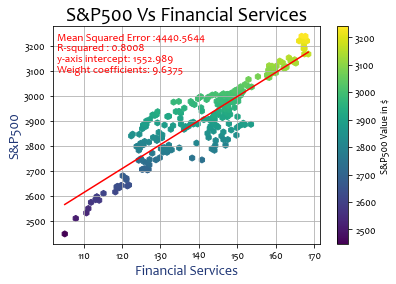

In [147]:
#check for linear relationship - Ameriprise Financial

fig, ax = plt.subplots()
plt.scatter(tensector_df['Ameriprise Financial'],tensector_df['S&P'],c=tensector_df['S&P'],marker="h")
plt.title('S&P500 Vs Financial Services',fontsize=20)
plt.xlabel('Financial Services',color='#203776',fontsize=14)
plt.ylabel('S&P500',color='#203776',fontsize=14)
plt.grid(True)
plt.rcParams["font.family"] = "candara"
plt.annotate(texts,(103,3100),fontsize=11,color="red")
clb = plt.colorbar()
clb.set_label("S&P500 Value in $")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.show()

fig.savefig('Financial Services.png',dpi=300)

In [148]:
X = tensector_df['Consumer Discretionary'].values.reshape(-1, 1)
y = tensector_df["S&P"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)
X

Shape:  (251, 1) (251, 1)


array([[1539.13],
       [1500.28],
       [1575.39],
       [1629.51],
       [1656.58],
       [1659.42],
       [1656.22],
       [1640.56],
       [1617.21],
       [1674.56],
       [1683.78],
       [1693.22],
       [1696.2 ],
       [1632.17],
       [1640.02],
       [1654.93],
       [1670.57],
       [1637.89],
       [1593.88],
       [1670.43],
       [1718.73],
       [1626.23],
       [1633.31],
       [1658.81],
       [1640.26],
       [1614.37],
       [1588.22],
       [1591.  ],
       [1638.01],
       [1640.  ],
       [1622.65],
       [1607.95],
       [1627.58],
       [1622.1 ],
       [1619.44],
       [1631.56],
       [1633.  ],
       [1636.4 ],
       [1641.09],
       [1639.83],
       [1671.73],
       [1696.17],
       [1692.43],
       [1668.95],
       [1625.95],
       [1620.8 ],
       [1670.62],
       [1673.1 ],
       [1690.81],
       [1686.22],
       [1712.36],
       [1742.15],
       [1761.85],
       [1797.27],
       [1819.26],
       [17

In [149]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [150]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.75187411]]
y-axis intercept:  [1567.02658787]


In [151]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1500.28]]
Max X Value: [[2020.99]]


In [152]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [153]:
# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 16502.804396978714
R-squared (R2 ): 0.2598867067555397


In [154]:
text1 = "Mean Squared Error :16502.804"
text2 = "R-squared :0.2598"
text3 = "y-axis intercept: 1567.026"
text4 = "Weight coefficients: 0.7518"
texts = f"{text1}\n{text2}\n{text3}\n{text4}"

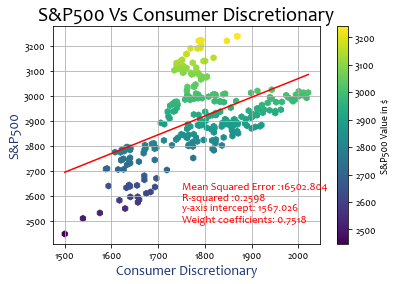

In [155]:
#check for linear relationship - Consumer Discretionary

fig, ax = plt.subplots()
plt.scatter(tensector_df['Consumer Discretionary'],tensector_df['S&P'],c=tensector_df['S&P'],marker="h")
plt.title('S&P500 Vs Consumer Discretionary',fontsize=20)
plt.xlabel('Consumer Discretionary',color='#203776',fontsize=14)
plt.ylabel('S&P500',color='#203776',fontsize=14)
plt.grid(True)
plt.rcParams["font.family"] = "candara"
plt.annotate(texts,(1750,2500),fontsize=11,color="red")
clb = plt.colorbar()
clb.set_label("S&P500 Value in $")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.show()

fig.savefig('Consumer Discretionary.png',dpi=300)

In [156]:
X = tensector_df['Utilities'].values.reshape(-1, 1)
y = tensector_df["S&P"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)
X

Shape:  (251, 1) (251, 1)


array([[ 88.77],
       [ 89.12],
       [ 89.79],
       [ 88.84],
       [ 90.14],
       [ 88.99],
       [ 90.76],
       [ 90.64],
       [ 90.43],
       [ 91.42],
       [ 91.79],
       [ 92.56],
       [ 92.61],
       [ 92.77],
       [ 94.24],
       [ 94.64],
       [ 93.27],
       [ 93.02],
       [ 93.08],
       [ 93.74],
       [ 95.67],
       [ 95.21],
       [ 95.58],
       [ 95.86],
       [ 95.15],
       [ 96.87],
       [ 97.74],
       [ 97.6 ],
       [ 97.67],
       [ 97.44],
       [ 97.25],
       [ 98.05],
       [ 98.7 ],
       [ 98.66],
       [100.38],
       [100.98],
       [100.88],
       [101.04],
       [101.04],
       [101.62],
       [101.44],
       [101.71],
       [101.27],
       [101.06],
       [101.65],
       [102.53],
       [104.03],
       [104.92],
       [105.11],
       [104.99],
       [105.81],
       [105.13],
       [104.35],
       [104.69],
       [106.22],
       [106.78],
       [106.69],
       [107.2 ],
       [105.87

In [157]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [158]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[11.36368124]]
y-axis intercept:  [1631.28184189]


In [159]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[88.77]]
Max X Value: [[129.5]]


In [160]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [161]:
# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 8480.649554019612
R-squared (R2 ): 0.6196621301875984


In [162]:
text1 = "Mean Squared Error :8480.649"
text2 = "R-squared :0.6196"
text3 = "y-axis intercept: 1631.281"
text4 = "Weight coefficients: 11.3636"
texts = f"{text1}\n{text2}\n{text3}\n{text4}"

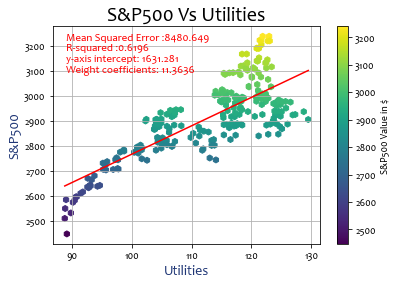

In [163]:
#check for linear relationship - Utilities

fig, ax = plt.subplots()
plt.scatter(tensector_df['Utilities'],tensector_df['S&P'],c=tensector_df['S&P'],marker="h")
plt.title('S&P500 Vs Utilities',fontsize=20)
plt.xlabel('Utilities',color='#203776',fontsize=14)
plt.ylabel('S&P500',color='#203776',fontsize=14)
plt.grid(True)
plt.rcParams["font.family"] = "candara"
plt.annotate(texts,(89,3100),fontsize=11,color="red")
clb = plt.colorbar()
clb.set_label("S&P500 Value in $")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.show()

fig.savefig('Utilities.png',dpi=300)

In [164]:
X = tensector_df['Real Estate'].values.reshape(-1, 1)
y = tensector_df["S&P"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)
X

Shape:  (251, 1) (251, 1)


array([[350.  ],
       [345.94],
       [353.79],
       [354.5 ],
       [361.86],
       [357.32],
       [370.68],
       [371.43],
       [376.58],
       [382.98],
       [381.11],
       [381.83],
       [374.67],
       [371.01],
       [365.26],
       [371.28],
       [369.44],
       [377.11],
       [379.29],
       [383.01],
       [394.  ],
       [396.38],
       [395.29],
       [395.79],
       [390.1 ],
       [389.79],
       [395.82],
       [400.07],
       [397.48],
       [391.91],
       [420.59],
       [421.39],
       [430.59],
       [431.53],
       [425.86],
       [428.54],
       [428.98],
       [425.84],
       [418.15],
       [423.5 ],
       [432.79],
       [426.98],
       [426.92],
       [424.66],
       [426.75],
       [430.38],
       [438.33],
       [438.5 ],
       [438.87],
       [440.48],
       [441.61],
       [444.1 ],
       [443.55],
       [448.08],
       [458.29],
       [451.5 ],
       [446.18],
       [447.67],
       [448.08

In [165]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [166]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[1.97462864]]
y-axis intercept:  [1930.04065656]


In [167]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[345.94]]
Max X Value: [[583.02]]


In [168]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [169]:
# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 6484.044952678678
R-squared (R2 ): 0.7092053115317352


In [170]:
text1 = "Mean Squared Error :6484.044"
text2 = "R-squared :0.7092"
text3 = "y-axis intercept: 1930.040"
text4 = "Weight coefficients: 1.9746"
texts = f"{text1}\n{text2}\n{text3}\n{text4}"

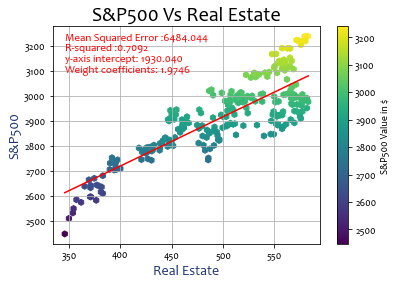

In [171]:
#check for linear relationship - Real Estate

fig, ax = plt.subplots()
plt.scatter(tensector_df['Real Estate'],tensector_df['S&P'],c=tensector_df['S&P'],marker="h")
plt.title('S&P500 Vs Real Estate',fontsize=20)
plt.xlabel('Real Estate',color='#203776',fontsize=14)
plt.ylabel('S&P500',color='#203776',fontsize=14)
plt.grid(True)
plt.rcParams["font.family"] = "candara"
plt.annotate(texts,(346,3100),fontsize=11,color="red")
clb = plt.colorbar()
clb.set_label("S&P500 Value in $")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.show()

fig.savefig('Real Estate.png',dpi=300)

In [172]:
X = tensector_df['Health Care'].values.reshape(-1, 1)
y = tensector_df["S&P"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)
X

Shape:  (251, 1) (251, 1)


array([[114.88],
       [111.31],
       [114.66],
       [115.28],
       [116.34],
       [117.21],
       [115.94],
       [116.18],
       [114.68],
       [117.09],
       [116.8 ],
       [119.16],
       [116.59],
       [117.09],
       [118.79],
       [114.99],
       [114.97],
       [115.03],
       [115.71],
       [116.94],
       [119.86],
       [120.89],
       [120.17],
       [120.43],
       [119.27],
       [117.5 ],
       [119.6 ],
       [118.01],
       [119.49],
       [119.65],
       [120.75],
       [122.48],
       [122.13],
       [122.66],
       [122.72],
       [124.  ],
       [123.89],
       [124.67],
       [125.68],
       [126.29],
       [128.84],
       [127.46],
       [128.49],
       [126.68],
       [126.34],
       [126.7 ],
       [123.5 ],
       [123.5 ],
       [124.31],
       [123.08],
       [123.94],
       [125.24],
       [126.59],
       [128.16],
       [128.31],
       [128.3 ],
       [129.87],
       [131.02],
       [128.77

In [173]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [174]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-2.19898237]]
y-axis intercept:  [3168.34694355]


In [175]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[106.79]]
Max X Value: [[132.43]]


In [176]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [177]:
# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 22104.16778280002
R-squared (R2 ): 0.008678281665188359


In [178]:
text1 = "Mean Squared Error :22104.167"
text2 = "R-squared :0.0086"
text3 = "y-axis intercept: 3168.346"
text4 = "Weight coefficients: -2.1989"
texts = f"{text1}\n{text2}\n{text3}\n{text4}"

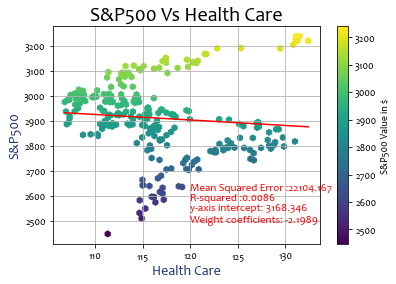

In [179]:
#check for linear relationship - Health Care

fig, ax = plt.subplots()
plt.scatter(tensector_df['Health Care'],tensector_df['S&P'],c=tensector_df['S&P'],marker="h")
plt.title('S&P500 Vs Health Care',fontsize=20)
plt.xlabel('Health Care',color='#203776',fontsize=14)
plt.ylabel('S&P500',color='#203776',fontsize=14)
plt.grid(True)
plt.rcParams["font.family"] = "candara"
plt.annotate(texts,(120,2500),fontsize=11,color="red")
clb = plt.colorbar()
clb.set_label("S&P500 Value in $")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.show()

fig.savefig('Health Care.png',dpi=300)

In [180]:
X = tensector_df['Materials'].values.reshape(-1, 1)
y = tensector_df["S&P"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)
X

Shape:  (251, 1) (251, 1)


array([[29.18],
       [28.45],
       [30.39],
       [30.62],
       [31.36],
       [31.35],
       [31.57],
       [31.64],
       [31.38],
       [31.4 ],
       [31.49],
       [31.96],
       [32.2 ],
       [30.97],
       [31.16],
       [31.01],
       [31.89],
       [31.59],
       [31.78],
       [31.91],
       [32.28],
       [32.6 ],
       [31.95],
       [32.2 ],
       [32.46],
       [31.4 ],
       [31.19],
       [30.92],
       [31.89],
       [32.06],
       [31.94],
       [32.11],
       [32.28],
       [33.48],
       [33.17],
       [32.3 ],
       [32.77],
       [31.44],
       [32.17],
       [31.27],
       [31.  ],
       [30.82],
       [29.89],
       [29.23],
       [27.92],
       [28.02],
       [28.71],
       [28.67],
       [28.75],
       [28.38],
       [28.71],
       [28.64],
       [28.55],
       [28.18],
       [28.3 ],
       [26.85],
       [26.93],
       [26.42],
       [26.6 ],
       [27.17],
       [27.31],
       [27.84],
       [

In [181]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [182]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-24.90196608]]
y-axis intercept:  [3511.24418488]


In [183]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[17.66]]
Max X Value: [[33.48]]


In [184]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [185]:
# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 10170.210234675567
R-squared (R2 ): 0.543889171276108


In [186]:
text1 = "Mean Squared Error :10170.210"
text2 = "R-squared : 0.5438"
text3 = "y-axis intercept: 3511.244"
text4 = "Weight coefficients: -24.9019"
texts = f"{text1}\n{text2}\n{text3}\n{text4}"

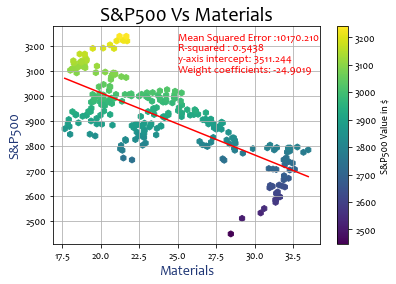

In [187]:
#check for linear relationship - Materials

fig, ax = plt.subplots()
plt.scatter(tensector_df['Materials'],tensector_df['S&P'],c=tensector_df['S&P'],marker="h")
plt.title('S&P500 Vs Materials',fontsize=20)
plt.xlabel('Materials',color='#203776',fontsize=14)
plt.ylabel('S&P500',color='#203776',fontsize=14)
plt.grid(True)
plt.rcParams["font.family"] = "candara"
plt.annotate(texts,(25,3100),fontsize=11,color="red")
clb = plt.colorbar()
clb.set_label("S&P500 Value in $")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.show()

fig.savefig('Materials.png',dpi=300)

In [188]:
X = tensector_df['Energy'].values.reshape(-1, 1)
y = tensector_df["S&P"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)
X

Shape:  (251, 1) (251, 1)


array([[14.72],
       [14.62],
       [15.41],
       [15.62],
       [15.48],
       [16.07],
       [16.35],
       [16.11],
       [15.83],
       [15.83],
       [15.54],
       [15.79],
       [16.1 ],
       [15.69],
       [15.56],
       [15.8 ],
       [15.9 ],
       [15.83],
       [15.91],
       [16.02],
       [15.79],
       [16.  ],
       [16.15],
       [15.94],
       [15.91],
       [15.27],
       [15.13],
       [15.27],
       [15.45],
       [15.55],
       [16.91],
       [17.08],
       [17.03],
       [17.08],
       [16.68],
       [16.89],
       [16.67],
       [16.52],
       [16.79],
       [16.6 ],
       [17.08],
       [17.28],
       [17.27],
       [16.86],
       [16.86],
       [16.27],
       [16.57],
       [16.9 ],
       [17.32],
       [17.26],
       [17.27],
       [17.39],
       [17.12],
       [17.6 ],
       [17.69],
       [16.68],
       [16.71],
       [17.11],
       [17.06],
       [16.82],
       [16.71],
       [17.39],
       [

In [189]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [190]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-41.39254803]]
y-axis intercept:  [3499.99380115]


In [191]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[11.09]]
Max X Value: [[18.78]]


In [192]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [193]:
# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 15309.585561154392
R-squared (R2 ): 0.3133998613018627


In [194]:
text1 = "Mean Squared Error :15309.585"
text2 = "R-squared : 0.3133"
text3 = "y-axis intercept: 3499.993"
text4 = "Weight coefficients: -41.3925"
texts = f"{text1}\n{text2}\n{text3}\n{text4}"

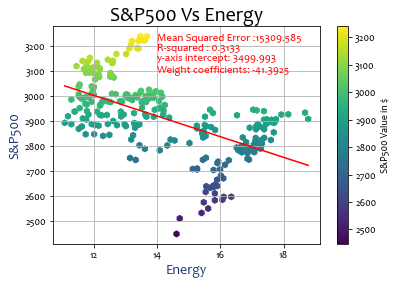

In [195]:
#check for linear relationship - Energy

fig, ax = plt.subplots()
plt.scatter(tensector_df['Energy'],tensector_df['S&P'],c=tensector_df['S&P'],marker="h")
plt.title('S&P500 Vs Energy',fontsize=20)
plt.xlabel('Energy',color='#203776',fontsize=14)
plt.ylabel('S&P500',color='#203776',fontsize=14)
plt.grid(True)
plt.rcParams["font.family"] = "candara"
plt.annotate(texts,(14,3100),fontsize=11,color="red")
clb = plt.colorbar()
clb.set_label("S&P500 Value in $")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.show()

fig.savefig('Energy.png',dpi=300)

In [196]:
X = tensector_df['Telecommunication Services'].values.reshape(-1, 1)
y = tensector_df['S&P'].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)
X

Shape:  (251, 1) (251, 1)


array([[65.26],
       [65.02],
       [67.49],
       [68.44],
       [67.77],
       [67.72],
       [67.96],
       [69.  ],
       [67.91],
       [67.14],
       [66.69],
       [66.25],
       [66.96],
       [66.83],
       [67.8 ],
       [68.66],
       [68.48],
       [67.62],
       [67.78],
       [68.32],
       [69.62],
       [69.63],
       [69.41],
       [66.85],
       [66.94],
       [68.28],
       [68.38],
       [68.44],
       [69.6 ],
       [69.07],
       [70.5 ],
       [72.05],
       [72.52],
       [72.75],
       [73.41],
       [73.2 ],
       [73.05],
       [72.53],
       [72.12],
       [72.21],
       [72.34],
       [71.65],
       [71.41],
       [70.78],
       [71.32],
       [70.65],
       [71.47],
       [71.7 ],
       [72.25],
       [72.34],
       [73.46],
       [73.68],
       [72.59],
       [72.06],
       [72.26],
       [71.9 ],
       [72.31],
       [73.34],
       [72.24],
       [69.15],
       [69.1 ],
       [69.97],
       [

In [197]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [198]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[27.87431388]]
y-axis intercept:  [811.08674041]


In [199]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[65.02]]
Max X Value: [[84.25]]


In [200]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [201]:
# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 9241.107797709948
R-squared (R2 ): 0.5855573052394463


In [202]:
text1 = "Mean Squared Error : 9241.107"
text2 = "R-squared :0.5855"
text3 = "y-axis intercept: 811.086"
text4 = "Weight coefficients: 27.8743"
texts = f"{text1}\n{text2}\n{text3}\n{text4}"

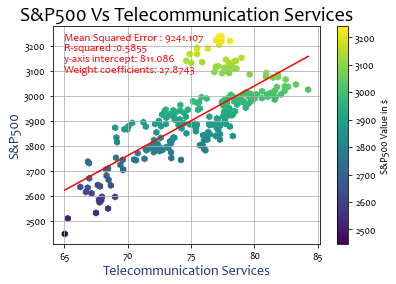

In [203]:
#check for linear relationship - Telecommunication Services

fig, ax = plt.subplots()
plt.scatter(tensector_df['Telecommunication Services'],tensector_df['S&P'],c=tensector_df['S&P'],marker="h")
plt.title('S&P500 Vs Telecommunication Services',fontsize=20)
plt.xlabel('Telecommunication Services',color='#203776',fontsize=14)
plt.ylabel('S&P500',color='#203776',fontsize=14)
plt.grid(True)
plt.rcParams["font.family"] = "candara"
plt.annotate(texts,(65,3100),fontsize=11,color="red")
clb = plt.colorbar()
clb.set_label("S&P500 Value in $")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.show()

fig.savefig('Telecommunication Services.png',dpi=300)

In [204]:
X = tensector_df['Industrials'].values.reshape(-1, 1)
y = tensector_df["S&P"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)
X

Shape:  (251, 1) (251, 1)


array([[84.18],
       [80.  ],
       [82.68],
       [83.23],
       [82.38],
       [83.76],
       [81.37],
       [80.07],
       [79.91],
       [81.2 ],
       [86.36],
       [86.74],
       [85.59],
       [83.34],
       [82.88],
       [84.03],
       [84.14],
       [84.6 ],
       [85.67],
       [87.47],
       [87.27],
       [87.49],
       [88.62],
       [89.46],
       [89.75],
       [87.86],
       [88.17],
       [89.15],
       [87.97],
       [88.58],
       [88.15],
       [88.31],
       [89.24],
       [88.5 ],
       [88.84],
       [89.43],
       [89.58],
       [89.53],
       [87.6 ],
       [87.81],
       [86.92],
       [84.31],
       [85.05],
       [84.33],
       [82.61],
       [82.4 ],
       [82.38],
       [79.85],
       [81.21],
       [81.49],
       [81.69],
       [80.73],
       [81.34],
       [79.83],
       [81.  ],
       [79.63],
       [78.12],
       [77.49],
       [78.53],
       [78.6 ],
       [79.78],
       [80.87],
       [

In [205]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [206]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[22.87708057]]
y-axis intercept:  [925.89139506]


In [207]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[77.49]]
Max X Value: [[95.28]]


In [208]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [209]:
# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 13860.758574071784
R-squared (R2 ): 0.3783764608516623


In [120]:
text1 = "Mean Squared Error :13860.758"
text2 = "R-squared : 0.3783"
text3 = "y-axis intercept: 925.89"
text4 = "Weight coefficients: 22.877"
texts = f"{text1}\n{text2}\n{text3}\n{text4}"

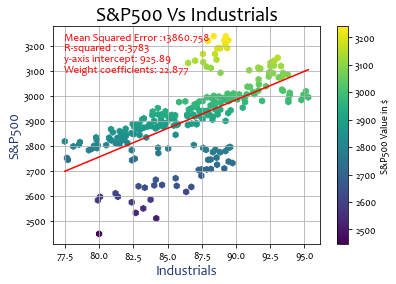

In [124]:
#check for linear relationship - Industrials

fig, ax = plt.subplots()
plt.scatter(tensector_df['Industrials'],tensector_df['S&P'],c=tensector_df['S&P'],marker="h")
plt.title('S&P500 Vs Industrials',fontsize=20)
plt.xlabel('Industrials',color='#203776',fontsize=14)
plt.ylabel('S&P500',color='#203776',fontsize=14)
plt.grid(True)
plt.rcParams["font.family"] = "candara"
plt.annotate(texts,(77.4,3100),fontsize=11,color="red")
clb = plt.colorbar()
clb.set_label("S&P500 Value in $")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.show()

fig.savefig('Industrials.png',dpi=300)

In [38]:
#sklearn output for intercept and coefficients for each x dependent variable

X = tensector_df[['Consumer Staples','Information Technology','Ameriprise Financial','Consumer Discretionary','Utilities','Real Estate','Health Care','Materials','Energy','Telecommunication Services','Industrials']] # 10 variables for multiple regression
y = tensector_df['S&P']
 
# with sklearn fit the model with all of x dependent variables or features
regr = linear_model.LinearRegression()
regr.fit(X, y)

model = LinearRegression()
model.fit(X,y)
score = model.score(X,y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)
print('R2 Score: ', score)

Intercept:  127.49742400672221
Coefficients:  [2.04922966 2.12898079 1.5846658  0.20163682 4.62367919 0.04827168
 2.79561873 2.53025456 9.29576469 0.38791702 5.0981484 ]
R2 Score:  0.9914976984844348


# Coefficents

* Consumer Staples: 2.04922966
* Information Technology: 2.12898079
* Ameriprise Financial: 1.5846658
* Consumer Discretionary: 0.20163682
* Utilities: 4.62367919
* Real Estate: 0.04827168
* Health Care: 2.79561873
* Materials: 2.53025456
* Energy: 9.29576469
* Telecommunication Services: 0.38791702
* Industrials: 5.0981484

In [48]:
#Create a prediction with sklearn for Aug 3, 2020

con_staples = 129.3
info_tech = 435.75
financial = 155.69
con_disc = 3111.89
utilities = 147.06
real_estate = 779.12
health = 152.84
materials = 13.68
energy = 5.52
telecom = 106.88
industrials = 31.88


print ('Predicted S&P500: ', regr.predict([[con_staples, info_tech, financial, con_disc, utilities, real_estate, health, materials, energy, telecom, industrials]]))

Predicted S&P500:  [3629.12052454]


In [39]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    S&P   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     2534.
Date:                Mon, 17 Aug 2020   Prob (F-statistic):          1.72e-240
Time:                        19:43:29   Log-Likelihood:                -1014.4
No. Observations:                 251   AIC:                             2053.
Df Residuals:                     239   BIC:                             2095.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Final Formula is:

$SP500$ = $127.49$ + $(2.04*Consumer Staples)$ + $(2.12*Information Technology)$ + $(1.58*Financial)$ + $(0.20*Consumer Discretionary)$ + $(4.62*Utilities)$ + $(0.04*Real Estate)$ + $(2.79*Health Care)$ + $(2.53*Materials)$ + $(9.29*Energy)$ + $(0.38*Telecommunication Services)$ + $(5.09*Industrials)$